In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # maybe need it later if we try NNs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.io import arff
import warnings
warnings.filterwarnings("ignore")

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = arff.loadarff('/Users/Bjoern/Desktop/Summer/Work_on_Datasets/git/phishing/Training Dataset.arff')
df = pd.DataFrame(data[0])
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


In [3]:
# inting dataset
for i in df:
    df.loc[:,i] = df.loc[:,i].astype(int)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
# mean, sdv, etc.
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# check for null vals
df.isnull().sum().max()

0

In [6]:
# list features
df.columns 

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [7]:
# distribution of Phising:Not Phishing
print("Phishing: " + str(round(len(df[df['Result'] == 1])/len(df) * 100,2)) + "%")
print("Not Phishing: " + str(round(len(df[df['Result'] == -1])/len(df) * 100,2)) + "%")


Phishing: 55.69%
Not Phishing: 44.31%


Text(0.5, 1.0, 'Result Distributions \n (-1: No Phising || 1: Phising)')

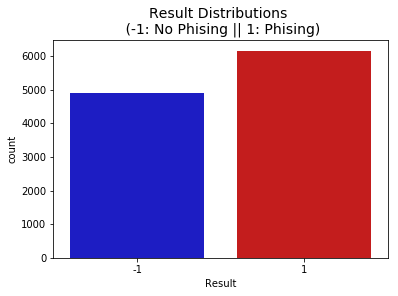

In [8]:
# graphed version of distribution
colors = ["#0101DF", "#DF0101"]

sns.countplot('Result', data=df, palette=colors)
plt.title('Result Distributions \n (-1: No Phising || 1: Phising)', fontsize=14)

In [9]:
X = df.drop('Result',axis = 1)
y = df['Result']

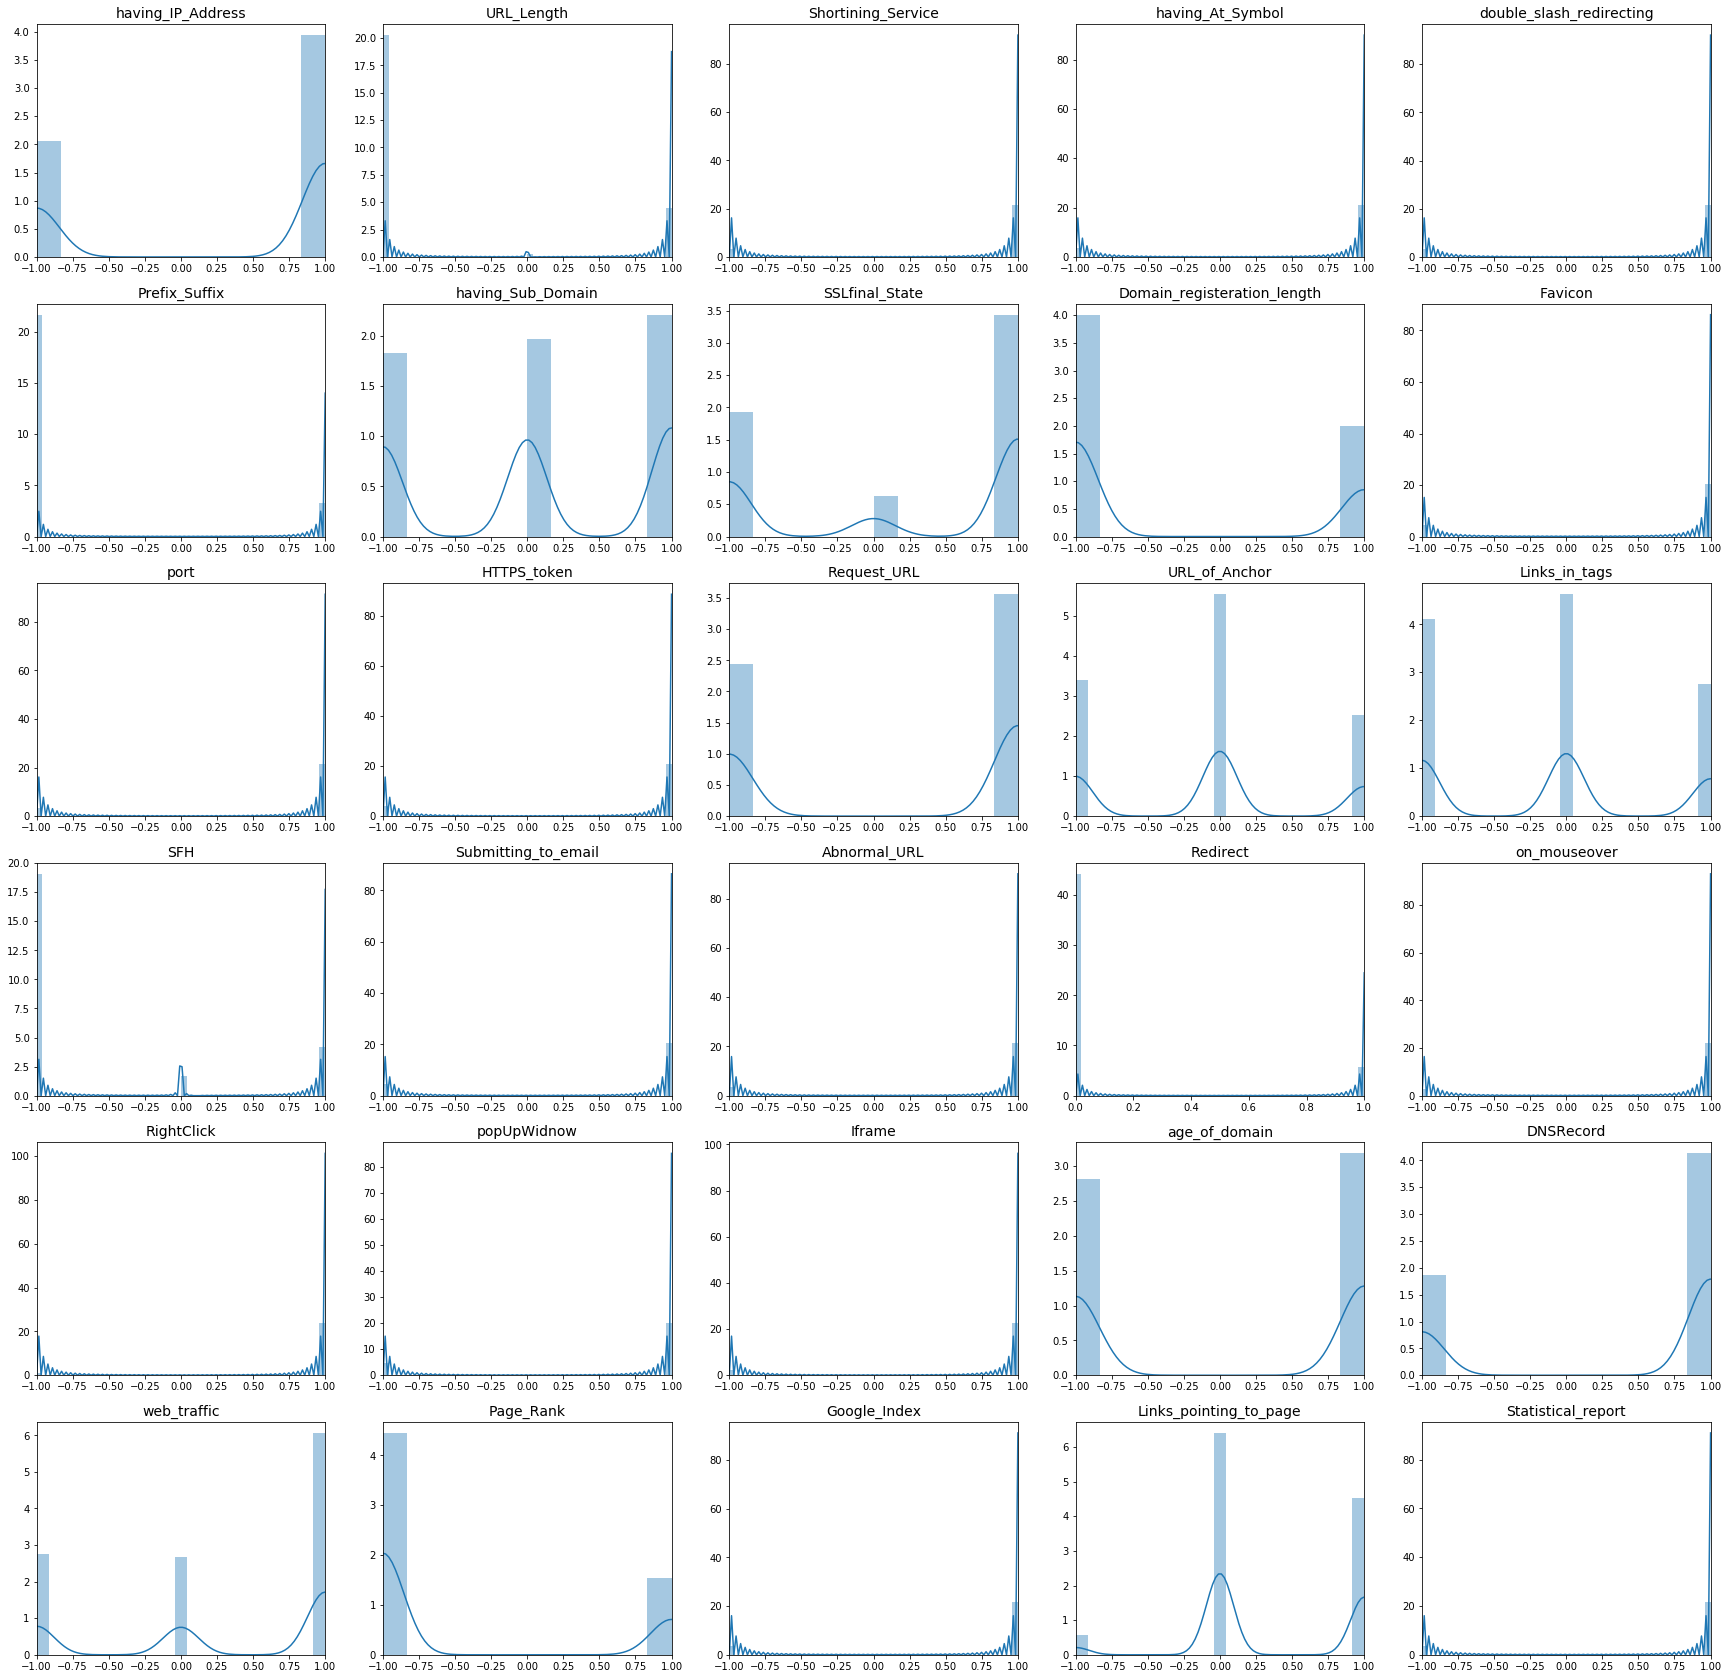

In [10]:
# Produce a histgram of the data vs how many there are

# There probably is a better way to do this but I haven't figured it out

# Use a barchart instead maybe

fig, ax = plt.subplots(6,5,figsize = (30,30))
ax = ax.flatten()

having_IP_Address = df['having_IP_Address'].values
URL_Length = df['URL_Length'].values
Shortining_Service = df['Shortining_Service'].values
having_At_Symbol = df['having_At_Symbol'].values
double_slash_redirecting = df['double_slash_redirecting'].values
Prefix_Suffix = df['Prefix_Suffix'].values
having_Sub_Domain = df['having_Sub_Domain'].values
SSLfinal_State = df['SSLfinal_State'].values
Domain_registeration_length = df['Domain_registeration_length'].values
Favicon = df['Favicon'].values
port = df['port'].values
HTTPS_token = df['HTTPS_token'].values
Request_URL = df['Request_URL'].values
URL_of_Anchor = df['URL_of_Anchor'].values
Links_in_tags = df['Links_in_tags'].values
SFH = df['SFH'].values
Submitting_to_email = df['Submitting_to_email'].values
Abnormal_URL = df['Abnormal_URL'].values
Redirect = df['Redirect'].values
on_mouseover = df['on_mouseover'].values
RightClick = df['RightClick'].values
popUpWidnow = df['popUpWidnow'].values
Iframe = df['Iframe'].values
age_of_domain = df['age_of_domain'].values
DNSRecord = df['DNSRecord'].values
web_traffic = df['web_traffic'].values
Page_Rank = df['Page_Rank'].values
Google_Index = df['Google_Index'].values
Links_pointing_to_page = df['Links_pointing_to_page'].values
Statistical_report = df['Statistical_report'].values

array_names = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


array_vars = [having_IP_Address, URL_Length, Shortining_Service,
       having_At_Symbol, double_slash_redirecting, Prefix_Suffix,
       having_Sub_Domain, SSLfinal_State, Domain_registeration_length,
       Favicon, port, HTTPS_token, Request_URL, URL_of_Anchor,
       Links_in_tags, SFH, Submitting_to_email, Abnormal_URL,
       Redirect, on_mouseover, RightClick, popUpWidnow, Iframe,
       age_of_domain, DNSRecord, web_traffic, Page_Rank,
    Google_Index, Links_pointing_to_page, Statistical_report]

for i in range(len(array_names)):
    sns.distplot(array_vars[i], ax = ax[i])
    ax[i].set_title(array_names[i], fontsize=14)
    ax[i].set_xlim([min(array_vars[i]), max(array_vars[i])])

plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

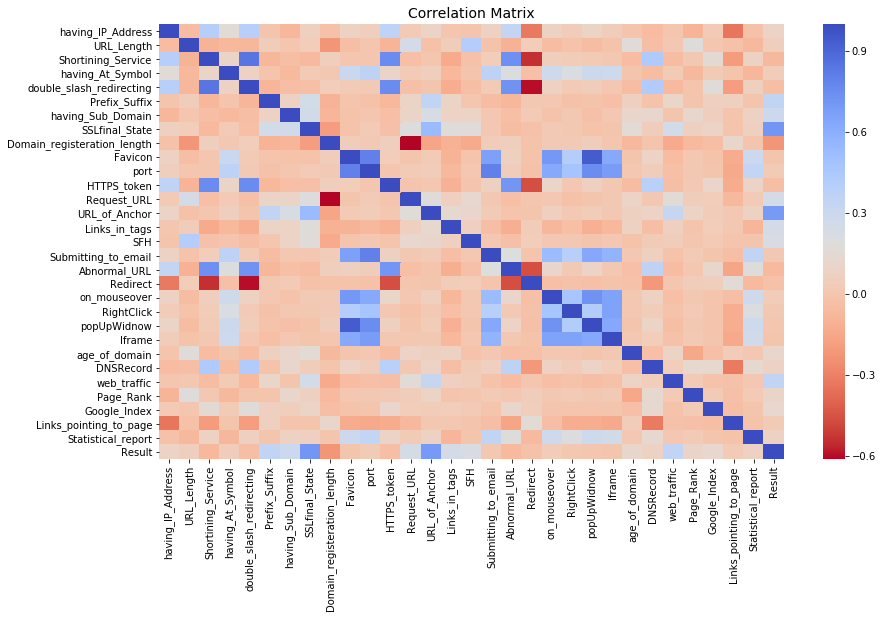

In [11]:
# Plot the correlation matrix between each feature
fig, ax = plt.subplots(figsize=(14,8))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':20})
ax.set_title('Correlation Matrix', fontsize =14)

In [12]:
# PCA/TSNE, 2D visualisation

# TSNE (also takes long time > 5 mins)
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

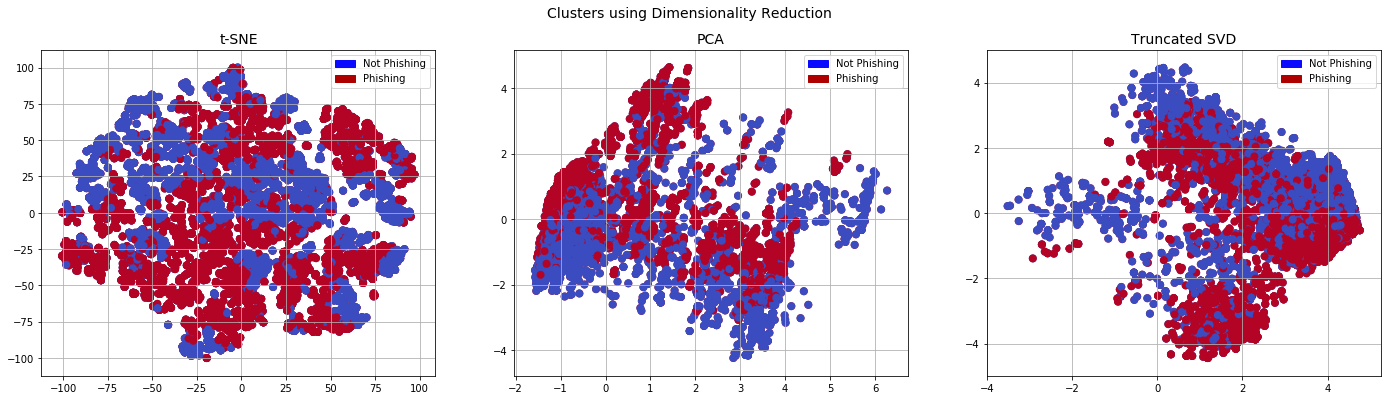

In [13]:
# plot reduced data

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Phishing')
red_patch = mpatches.Patch(color='#AF0000', label='Phishing')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == -1), cmap='coolwarm', label='No Phishing', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Phishing', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == -1), cmap='coolwarm', label='No Phishing', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Phishing', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == -1), cmap='coolwarm', label='No Phishing', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Phishing', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [14]:
# Split test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# PCA, not recommended but this is just to see how dimensionality reduction would work
components = 29
while True: # make sure it runs at least once
    X_pca = PCA(n_components = components).fit(X.values) 
    if (X_pca.noise_variance_ > 0.1):
        break
    components -= 1
components += 1  # we end with variance less than 90%, so add 1 to n_components to get > 90%
X_pca = PCA(n_components = components).fit(X.values)  # X_pca is the reduced feature 
print(X_pca.noise_variance_, components)

0.09623103211606852 21


In [16]:
# Recursive feature elimination - remove features

from sklearn.feature_selection import RFE

model = RandomForestClassifier() # Which classifier we use to determine importance of features, change this
n_features = 15 # Number of features, change this 

rfe = RFE(model, n_features_to_select = n_features)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)
print(rfe.score(X_train,y_train))

X_reduced = rfe.transform(X_train) # reduced

y_pred = rfe.predict(X_train)
print(f1_score(y_train,y_pred))

print('----'*30)

# Determining number of features using cross validation score, comparing regular X_train and X_reduced

from sklearn.model_selection import cross_val_score

training_score = cross_val_score(model, X_train, y_train, cv=5)
print(round(training_score.mean(),5))

print(round(cross_val_score(model, X_reduced, y_train, cv=5).mean(),5))

[ True False False False False  True  True  True  True False False False
  True  True  True  True False False False False False False False  True
  True  True  True  True  True False]
[ 1  2 10  6 13  1  1  1  1 12 14  4  1  1  1  1  3  8  7 11 16  5 15  1
  1  1  1  1  1  9]
0.9843962008141113
0.9859413202933984
------------------------------------------------------------------------------------------------------------------------
0.96732
0.96235


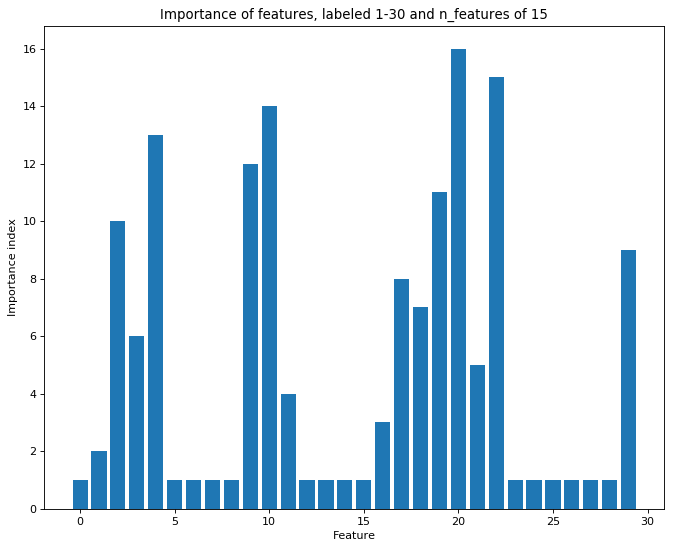

In [17]:
# plot histogram of importance

plt.figure(figsize=(10,8),dpi = 80)
plt.bar(range(30),rfe.ranking_)
plt.title('Importance of features, labeled 1-30 and n_features of ' + str(n_features))
plt.xlabel('Feature')
plt.ylabel('Importance index')
plt.show()

In [19]:
# Reduce data so that it doesn't take so long
shuffle_df = df.sample(frac=1)
new_df = shuffle_df[:500]

X_small = new_df.drop('Result', axis=1)
y_small = new_df['Result']

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

X_train_small = X_train_small.values
X_test_small = X_test_small.values
y_train_small = y_train_small.values
y_test_small = y_test_small.values

In [20]:
# Determining best classifier

classifiers = {"LogisticRegression": LogisticRegression(), 
               "KNearest": KNeighborsClassifier(), 
               "SupportVectorClassifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(),
               "RandomForest": RandomForestClassifier()}

for key, classifier in classifiers.items():
    
    classifier.fit(X_train_small,y_train_small)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier", key, "has a training score of", str(round(training_score.mean(),5)))

Classifier LogisticRegression has a training score of 0.90221
Classifier KNearest has a training score of 0.87753
Classifier SupportVectorClassifier has a training score of 0.91503
Classifier DecisionTreeClassifier has a training score of 0.87258
Classifier RandomForest has a training score of 0.91984


In [23]:
# Do some more testing on the classifiers

from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params)
log_reg_grid.fit(X_train_small, y_train_small)
log_reg = log_reg_grid.best_estimator_
print("logreg")

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knears_grid = GridSearchCV(KNeighborsClassifier(), knears_params)
knears_grid.fit(X_train_small,y_train_small)
knears = knears_grid.best_estimator_
print("knears")

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
svc_grid = GridSearchCV(SVC(), svc_params)
svc_grid.fit(X_train_small, y_train_small)
svc = svc_grid.best_estimator_
print("svc")

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params)
tree_grid.fit(X_train_small, y_train_small)
tree = tree_grid.best_estimator_
print("tree")

forest_params = {'n_estimators': [10,100,200,500],'max_features': ['auto', 'sqrt'],
                'max_depth' : [5,6,7,8], 'criterion' :['gini', 'entropy']}
forest_grid = GridSearchCV(RandomForestClassifier(),forest_params)
forest_grid.fit(X_train_small,y_train_small)
forest = forest_grid.best_estimator_
print("forest")

logreg
knears
svc
tree
forest


In [24]:
# score
log_reg_score = cross_val_score(log_reg, X_train_small, y_train_small, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears, X_train_small, y_train_small, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train_small, y_train_small, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree, X_train_small, y_train_small, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

forest_score = cross_val_score(forest, X_train_small, y_train_small, cv=5)
print('RandomForest Classifier Cross Validation Score', round(forest_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  91.75%
Knears Neighbors Cross Validation Score 85.01%
Support Vector Classifier Cross Validation Score 91.5%
DecisionTree Classifier Cross Validation Score 89.76%
RandomForest Classifier Cross Validation Score 92.24%
